# **Ch02. Maximum Likelihood Estimation**

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

path = 'height.txt'
xs  = np.loadtxt(path)

In [2]:
xs.shape

(25000,)

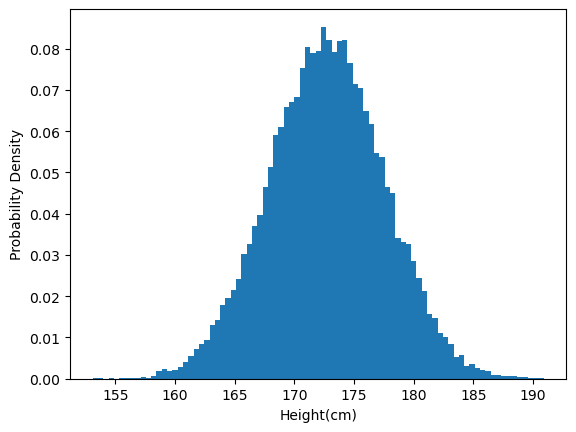

In [3]:
plt.hist(xs, bins='auto', density=True)
plt.xlabel('Height(cm)')
plt.ylabel('Probability Density')
plt.show()

샘플을 바탕으로 정규분포의 매개변수를 MLE를 이용해서 추정한다

## **정규 분포의 최대 가능도 추정**
예시, 키 데이터가 정규 분포라고 가정하고, MLE로 정규 분포의 매개변수를 추정

In [5]:
mu = np.mean(xs)
sigma = np.std(xs)

print(mu, sigma)

172.70250853667997 4.830167473396299


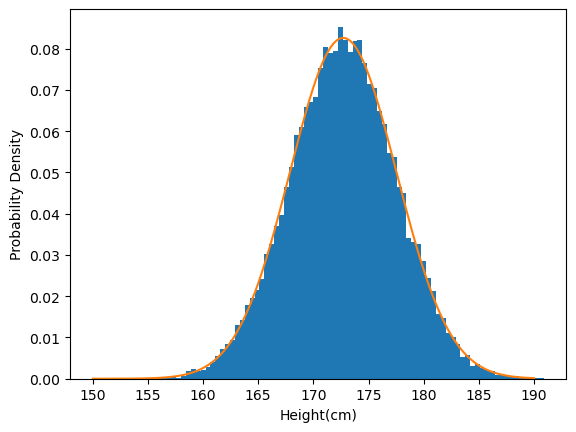

In [7]:
def normal(x, mu=0, sigma=1):
    y = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x - mu)**2 / (2 * sigma **2))
    return y

x = np.linspace(150, 190, 1000)
y = normal(x, mu, sigma)

plt.hist(xs, bins='auto', density=True)
plt.plot(x, y)
plt.xlabel('Height(cm)')
plt.ylabel('Probability Density')
plt.show()

매개변수 $\theta$를 통해 $D = \{x^{(1)}, x^{(1)} \cdots x^{(N)}\}$을 얻는다고 했을때, 샘플 $D$를 얻는 얻을 확률 밀도는

$p(D\,;\, \theta) = p(x^{(1)}\,;\,\theta)\:p(x^{(2)}\,;\,\theta)\:\cdots\:p(x^{(N)}\,;\,\theta)$

이러한 $p(D\,;\, \theta)$를 $\theta$를 인수로 받는 함수로 취급하며 이를 likelihood라고 한다.

데이터 $D$가 주어졌을떄, 어떤 $\theta$가 이 데이터를 가장 잘 설명하는가? $\theta$를 잘 찾아야한다. 단위 : (확률밀도)

* $\log{ab} = \log{a} + \log{b} $를 이용하면 계산이 쉬워진다

$\mathcal{N}(x; \mu, \sigma) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right)$

정규 분포에서는 $\mu, \sigma$에 대해서 편미분을 해서 구한다

$p(\mathcal{D};\mu, \sigma) = \prod_{n=1}^{N} \mathcal{N}(x^{(n)}; \mu, \sigma^2)$

$p(\mathcal{D};\mu, \sigma) = \prod_{n=1}^{N} \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left( -\frac{(x^{(n)} - \mu)^2}{2\sigma^2} \right)$

$\hat{\mu} = \frac{1}{N} \sum x^{(n)}$

$\hat{\sigma} = \sqrt{\frac{1}{N} \sum (x^{(n)} - \hat{\mu})^2}$


생성 모델을 사용하면 새로운 데이터를 생성할 수 있다.

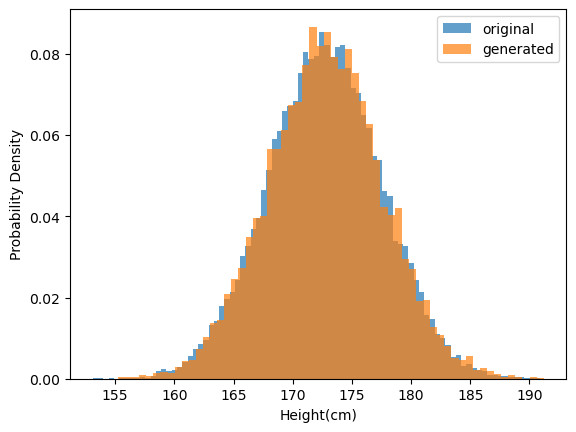

In [9]:
mu = np.mean(xs)
sigma = np.std(xs)
samples = np.random.normal(mu, sigma, 10000)

plt.hist(xs, bins='auto', density=True, alpha=0.7, label='original')
plt.hist(samples, bins='auto', density=True, alpha=0.7, label='generated')
plt.xlabel('Height(cm)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


생성모델이 관측 데이터의 특징을 잘 포착하여 비슷한 데이터를 생성

In [10]:
from scipy.stats import norm

p1 = norm.cdf(160, mu, sigma)
print('p(x <= 160):', p1) # 키가 160cm 이하일 확률

p2 = norm.cdf(180, mu, sigma)
print('p(x > 180):', 1-p2) # 키가 180cm 이상일 확률

p(x <= 160): 0.004271406830855
p(x > 180): 0.06541774339950823
